# Capstone Step 6. Documentation

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error

## Solution Proposed by Andrew Maguire

#### Unfortunately I do not have his CSV with the data but the results are almost identical

In [3]:
df=pd.read_csv('../3. Exploratory Data Analysis/step3_output_with_outliers.csv', index_col=0)
X=df.drop(['Name','AdultWeekend','state','summit_elev','base_elev'], axis=1)
y=df.AdultWeekend
scaler = preprocessing.StandardScaler().fit(X)
X_scaled=scaler.transform(X) 
y=y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(explained_variance_score(y_test, y_pred))
mean_absolute_error(y_test, y_pred)

0.9250668895534017


5.472630610805845

In [4]:
BM_scaled=scaler.transform(df[df['Name'].str.contains('Whitefish')].drop(['Name','AdultWeekend','state','summit_elev','base_elev'], axis=1))
BM_pred = model.predict(BM_scaled)
print ("The expected Big Mountain Resort adult weekend price is $%s " % ' '.join(map(str, BM_pred)))

The expected Big Mountain Resort adult weekend price is $88.34231499782113 


In [5]:
BMR = df[df['Name'].str.contains('Whitefish')] 
original_price = int(df[df['Name'].str.contains('Whitefish')][['AdultWeekend']].values)
print('The original price was $'+str(original_price))

The original price was $81


In [6]:
BMR_new = df[df['Name'].str.contains('Whitefish')] 
BMR_new = BMR_new.replace(to_replace=BMR_new['AdultWeekend'].values, value=BM_pred)

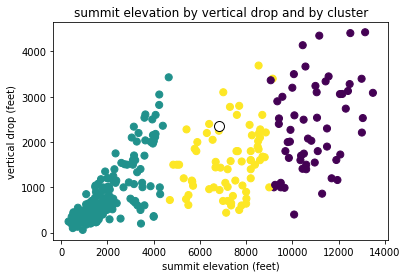

In [7]:
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(BMR['summit_elev'], BMR['vertical_drop'], c='white', s=100, edgecolors='black')
plt.xlabel('summit elevation (feet)')
plt.ylabel('vertical drop (feet)')
plt.title('summit elevation by vertical drop and by cluster')
plt.show()

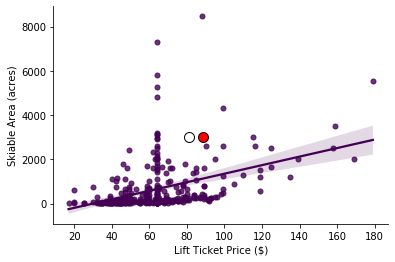

In [8]:
sns.regplot(x="AdultWeekend", y="SkiableTerrain_ac", data=df[(df['SkiableTerrain_ac']<25000)], color ="#440154FF",scatter_kws={"s": 25})
plt.scatter(x="AdultWeekend", y="SkiableTerrain_ac", data=BMR, c='white',s=100,edgecolors='black')
plt.scatter(x="AdultWeekend", y="SkiableTerrain_ac", data=BMR_new, c='red',s=100,edgecolors='black')
sns.despine()
plt.xlabel('Lift Ticket Price ($)')
plt.ylabel('Skiable Area (acres)')
plt.show()

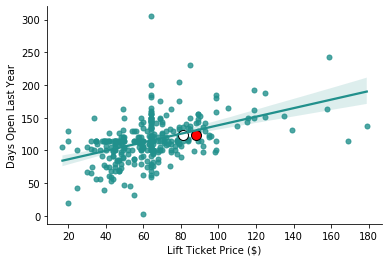

In [9]:
sns.regplot(x="AdultWeekend", y="daysOpenLastYear", data=df,color ="#21908CFF",scatter_kws={"s": 25})
sns.despine()
plt.scatter(x="AdultWeekend", y="daysOpenLastYear", data=BMR, c='white',s=100,edgecolors='black')
plt.scatter(x="AdultWeekend", y="daysOpenLastYear", data=BMR_new, c='red',s=100,edgecolors='black')
plt.xlabel('Lift Ticket Price ($)')
plt.ylabel('Days Open Last Year')
plt.show()

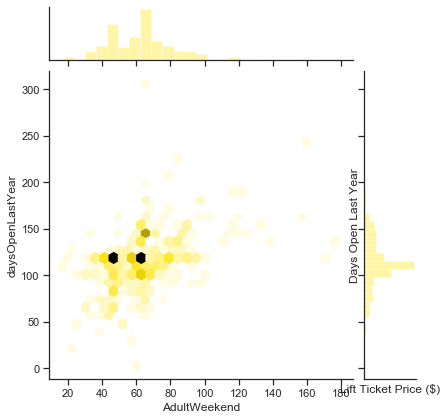

In [10]:
sns.set(style="ticks")
sns.jointplot(x=df['AdultWeekend'], y=df['daysOpenLastYear'], kind="hex", color="#FDE725FF")
sns.despine()
plt.xlabel('Lift Ticket Price ($)')
plt.ylabel('Days Open Last Year')
plt.show()

In [11]:
coeff_df = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])  
coeff_df['MAE'] = mean_absolute_error(y_test, y_pred)
coeff_df['ExpVar'] = explained_variance_score(y_test, y_pred)
coeff_df.to_csv('model/model_metrics_andrew_analysis.csv',index=False)

In [12]:
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, 'model/regression_model_adultweekend_andrew_analisys.joblib') 

['model/regression_model_adultweekend_andrew_analisys.joblib']

## Solution Proposed by Me

#### Best Model - I chose my model with the outliers since it provided the best explained variance and lowest MAE

In [13]:
df = pd.read_csv('../3. Exploratory Data Analysis/step3_output_with_outliers.csv', index_col=0)
dfd = pd.get_dummies(df['state'])
df = pd.concat([df.drop('state', axis=1), dfd], axis=1)
X = df.drop(['Name','AdultWeekend','summit_elev','base_elev'], axis=1)
y = df.loc[:,'AdultWeekend']
scaler = preprocessing.StandardScaler().fit(X)
X_scaled=scaler.transform(X) 
y = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print('The Mean Absolute Error is: ' + str(round(mae,2)))
print('The Explained Variance Score is: ' + str(round(evs,2)))

The Mean Absolute Error is: 4.9
The Explained Variance Score is: 0.94


In [14]:
BMR = df[df['Name'].str.contains('Whitefish')]
BMR_drop = BMR.drop(['Name','AdultWeekend', 'summit_elev','base_elev'], axis=1)
BMR_scaled = scaler.transform(BMR_drop) 
prediction = model.predict(BMR_scaled)
print ("The expected result for the Weekend Adult Ticket Price is ${}".format(int(prediction)))

The expected result for the Weekend Adult Ticket Price is $84


In [15]:
print('The original price was $'+str(original_price))

The original price was $81


In [16]:
BMR_new = df[df['Name'].str.contains('Whitefish')] 
BMR_new = BMR_new.replace(to_replace=BMR_new['AdultWeekend'].values, value=prediction)

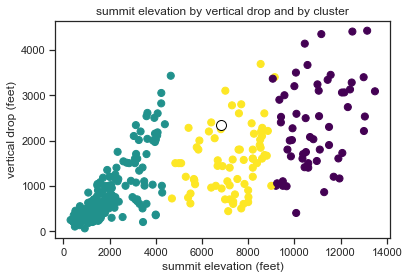

In [17]:
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(BMR['summit_elev'], BMR['vertical_drop'], c='white', s=100, edgecolors='black')
plt.xlabel('summit elevation (feet)')
plt.ylabel('vertical drop (feet)')
plt.title('summit elevation by vertical drop and by cluster')
plt.show()

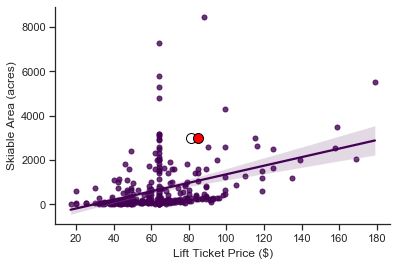

In [18]:
sns.regplot(x="AdultWeekend", y="SkiableTerrain_ac", data=df[(df['SkiableTerrain_ac']<25000)], color ="#440154FF",scatter_kws={"s": 25})
plt.scatter(x="AdultWeekend", y="SkiableTerrain_ac", data=BMR, c='white',s=100,edgecolors='black')
plt.scatter(x="AdultWeekend", y="SkiableTerrain_ac", data=BMR_new, c='red',s=100,edgecolors='black')
sns.despine()
plt.xlabel('Lift Ticket Price ($)')
plt.ylabel('Skiable Area (acres)')
plt.show()

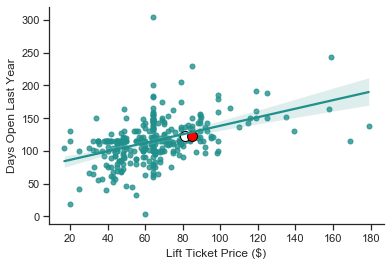

In [19]:
sns.regplot(x="AdultWeekend", y="daysOpenLastYear", data=df,color ="#21908CFF",scatter_kws={"s": 25})
sns.despine()
plt.scatter(x="AdultWeekend", y="daysOpenLastYear", data=BMR, c='white',s=100,edgecolors='black')
plt.scatter(x="AdultWeekend", y="daysOpenLastYear", data=BMR_new, c='red',s=100,edgecolors='black')
plt.xlabel('Lift Ticket Price ($)')
plt.ylabel('Days Open Last Year')
plt.show()

In [20]:
coeff_df = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])  
coeff_df['MAE'] = mean_absolute_error(y_test, y_pred)
coeff_df['ExpVar'] = explained_variance_score(y_test, y_pred)
coeff_df.to_csv('model/model_metrics_own_analysis.csv',index=False)

In [21]:
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, 'model/regression_model_adultweekend_own_analisys.joblib') 

['model/regression_model_adultweekend_own_analisys.joblib']

## Another analysis I made taking out State

In [22]:
df = pd.read_csv('../3. Exploratory Data Analysis/step3_output_with_outliers.csv', index_col=0)
dfd = pd.get_dummies(df['state'])
df = pd.concat([df.drop('state', axis=1), dfd], axis=1)
dfns = df.drop(df.iloc[:, 25:].head(), axis=1)
dfns_ne = dfns.drop(columns=['summit_elev'])
X = dfns_ne.drop(['Name','AdultWeekend'], axis=1)
y = dfns_ne.loc[:,'AdultWeekend']
scaler = preprocessing.StandardScaler().fit(X)
X_scaled=scaler.transform(X) 
y = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print('The Mean Absolute Error is: ' + str(round(mae,2)))
print('The Explained Variance Score is: ' + str(round(evs,2)))

The Mean Absolute Error is: 5.33
The Explained Variance Score is: 0.93


In [23]:
BMR = dfns_ne[dfns_ne['Name'].str.contains('Whitefish')]
BMR_drop = BMR.drop(['Name','AdultWeekend'], axis=1)
BMR_scaled = scaler.transform(BMR_drop) 
prediction = model.predict(BMR_scaled)
print ("The expected result for the Weekend Adult Ticket Price is ${}".format(int(prediction)))

The expected result for the Weekend Adult Ticket Price is $89


In [24]:
coeff_df = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])  
coeff_df['MAE'] = mean_absolute_error(y_test, y_pred)
coeff_df['ExpVar'] = explained_variance_score(y_test, y_pred)
coeff_df.to_csv('model/model_metrics_own_analysis_2.csv',index=False)

In [25]:
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, 'model/regression_model_adultweekend_own_analisys_2.joblib') 

['model/regression_model_adultweekend_own_analisys_2.joblib']